In [3]:
import pyroKebabs as pb
import pandas as pd
import numpy as np
from Bio.Seq import Seq

ModuleNotFoundError: No module named 'pyroKebabs'

In [3]:
promoter_data_raw = pd.read_csv('promoters.csv', sep=',')
promoter_data = {'data': promoter_data_raw.iloc[:, -1],
             'target': np.where(promoter_data_raw.iloc[:, 0] == '-', -1 ,1),
             'feature_names': promoter_data_raw.columns[2],
             'target_names': ['pos', 'neg']}

#data must be presented in the form of bioSeq
data = [Seq(x) for x in promoter_data['data']]
target = promoter_data['target']
#data = [Seq(x) for x in ['AATTGGCC', 'ACGTACGT', 'CCGGTTAA']]

In [4]:
flo = pb.Pybabs(5,0,data,target)

In [5]:
flo.unbiasedCV(data,target,2,0)

K=0 G=0
Kernel for k=0 and g=0 built
>acc=1.000, est=0.821, cfg={'C': 0.0625}
>acc=1.000, est=0.801, cfg={'C': 0.125}
>acc=0.545, est=0.853, cfg={'C': 8}
>acc=0.909, est=0.863, cfg={'C': 0.25}
>acc=1.000, est=0.863, cfg={'C': 0.5}
>acc=0.909, est=0.769, cfg={'C': 0.125}
>acc=0.700, est=0.854, cfg={'C': 0.0625}
>acc=0.900, est=0.854, cfg={'C': 0.0625}
>acc=0.900, est=0.833, cfg={'C': 0.5}
>acc=0.700, est=0.844, cfg={'C': 0.125}
Accuracy: 0.856 (0.147)
K=1 G=0
Kernel for k=1 and g=0 built
>acc=0.727, est=0.789, cfg={'C': 1}
>acc=1.000, est=0.810, cfg={'C': 0.5}
>acc=0.909, est=0.842, cfg={'C': 0.5}
>acc=0.909, est=0.854, cfg={'C': 4}
>acc=0.636, est=0.853, cfg={'C': 0.0625}
>acc=0.818, est=0.852, cfg={'C': 0.0625}
>acc=0.900, est=0.896, cfg={'C': 0.5}
>acc=0.900, est=0.844, cfg={'C': 0.0625}
>acc=0.900, est=0.865, cfg={'C': 0.0625}
>acc=0.900, est=0.823, cfg={'C': 0.25}
Accuracy: 0.860 (0.100)


In [6]:
model = flo.pybabsSVMtrain(data,target,5,0,0.03125)

acc=1.0
Trained linear SVM in 5 seconds


In [7]:
df,dict = flo.getWeights(5, model)
df
#print(dict)
#print(data)

,letters,val
1023,TTTTT,0.103578
868,TCGCA,0.097135
1,AAAAC,0.093368
508,CTTTA,0.090284
0,AAAAA,0.084976
...,...,...
270,CAATG,-0.087416
151,AGCCT,-0.088236
142,AGATG,-0.091127
835,TCAAT,-0.107215


Profile is generated for Seq:tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt


c:\Users\Semperro\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


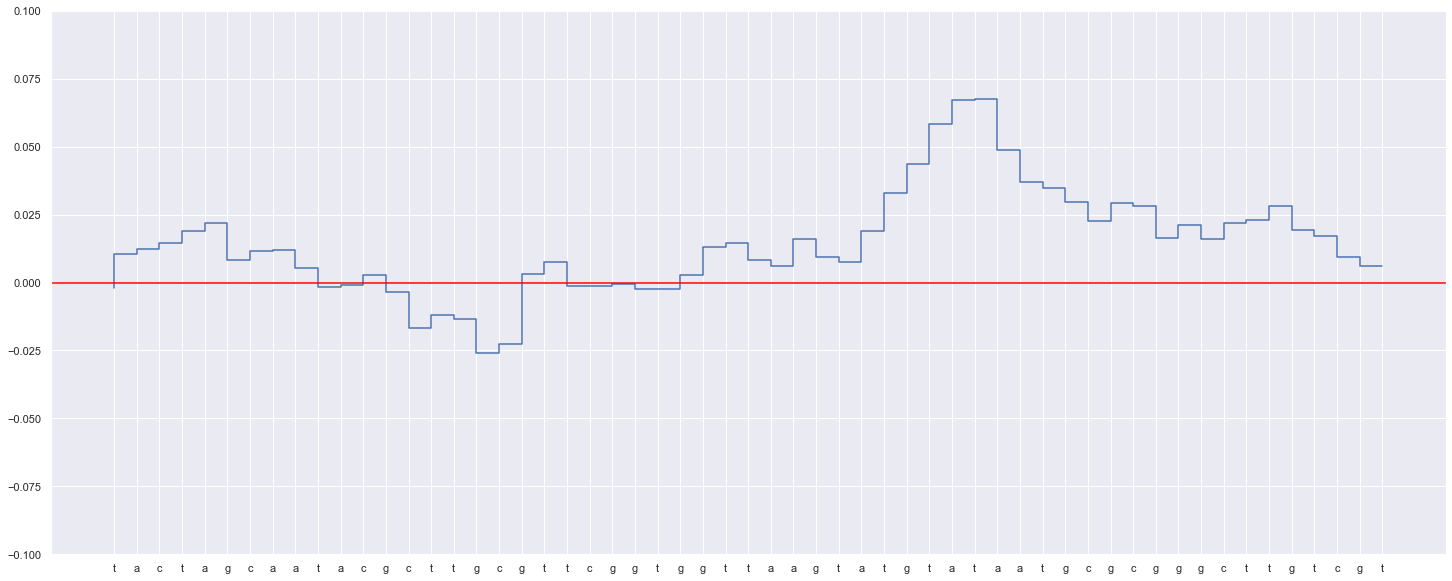

In [8]:
flo.getPredProfile(0,5,data)